<a href="https://colab.research.google.com/github/alfredoaguiararce/robot-uniciclo-python/blob/main/Demostraci%C3%B3n_funci%C3%B3n_de_activacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Demostracion sobre como afecta B a la sigmoidal suave

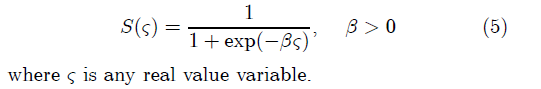

Basado en la ecuacion 5 del paper

### 1. Agregar librerias necesarias

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math 

### 2. Configuracion de muestreo para la señal de muestra.

In [27]:
tiempo_inicial = 0
tiempo_final = 180 #segundos
t = tiempo_final
tiempo_intervalos = 2 #segundos; steps;

#Generacion de muestreo
muestras_totales = (int) (tiempo_final / tiempo_intervalos)
arreglo_tiempo = np.linspace(tiempo_inicial, tiempo_final, muestras_totales)

In [22]:
def ramp(time_array, amplitude):
  """
    Esta funcion regresa una funcion rampa que se usara como señal de muestra
  """
  signal = []
  for sec in time_array:
    value_i = amplitude * (sec if sec >= 0 else 0)
    signal.append(value_i)
  
  return signal

In [23]:
def simple_plotting(signal, label_x = "", label_y = "", title = ""):
  #Grafica simple
  plt.plot(signal)
  plt.xlabel(label_x)
  plt.ylabel(label_y)
  plt.title(title)
  plt.grid(True)
  plt.show()

### 3. Señales de muestra 

In [5]:
signal_ramp_x11 = ramp(arreglo_tiempo, 1)
signal_ramp_x12 = ramp(arreglo_tiempo, -1)

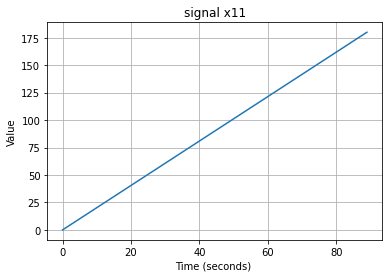

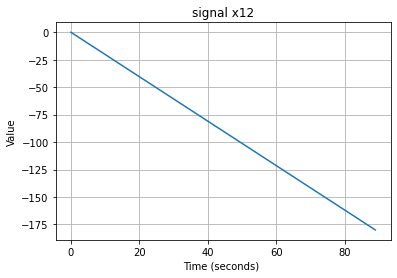

In [6]:
simple_plotting(signal_ramp_x11, "Time (seconds) ", "Value", "signal x11")
simple_plotting(signal_ramp_x12, "Time (seconds) ", "Value", "signal x12")

### Sigmoidal Suave

Demostracion de la formula S(*)

* Se propone que B > 0 en el archivo cientifico
* Basado en la tesis de la Dra Alma B se trata de un valor cercano a uno positivo particularmente en todos los ejemplo como 2*e^(-3)


In [15]:
def S(c, B):
  """
  Regresa la sigmoide de un arreglo de datos que permite 
  c = arreglo de la señal discreto en el tiempo.
  """
  signal = []

  for i in range(len(c)):
    val = 1 / (1 + math.exp(- B * c[i]))
    signal.append(float (val))
  
  return signal

In [20]:
#Reacciones de la sigmoidal suave con Betas distintas
Sx11_v1 = S(signal_ramp_x11, 0.01) # Señal rampa con Beta = 0.01
Sx11_v2 = S(signal_ramp_x11, 0.1)# Señal rampa con Beta =0.1
Sx11_v3 = S(signal_ramp_x11, 2 * math.exp(-3))# Señal rampa con Beta = 2e^-3

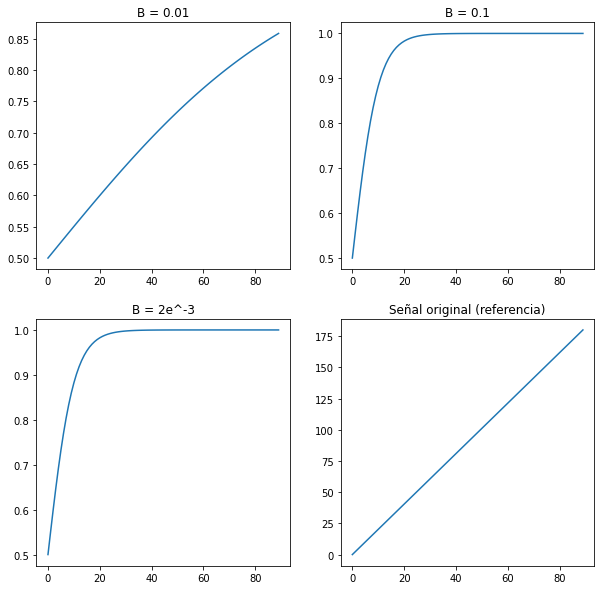

In [31]:
# Inicializamos la grafica
dim_img = 10
plt.rcParams["figure.figsize"] = (dim_img,dim_img)
figure, axis = plt.subplots(2, 2)
  
axis[0, 0].plot(Sx11_v1)
axis[0, 0].set_title("B = 0.01")

axis[0, 1].plot(Sx11_v2)
axis[0, 1].set_title("B = 0.1")

axis[1, 0].plot(Sx11_v3)
axis[1, 0].set_title("B = 2e^-3")

axis[1, 1].plot(signal_ramp_x11)
axis[1, 1].set_title("Señal original (referencia)")
  
# Combine all the operations and display
plt.show()